<a href="https://colab.research.google.com/github/saokotie/Homelearning/blob/main/worksheet1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
2 ** 10

1024

In [37]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [39]:
!curl -O https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1213  100  1213    0     0  15393      0 --:--:-- --:--:-- --:--:-- 15551


In [41]:
!unzip -q kagglecatsanddogs_3367a.zip
!ls

[kagglecatsanddogs_3367a.zip]
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of kagglecatsanddogs_3367a.zip or
        kagglecatsanddogs_3367a.zip.zip, and cannot find kagglecatsanddogs_3367a.zip.ZIP, period.
cats_and_dogs_filtered	    kagglecatsanddogs_3367a.zip
cats_and_dogs_filtered.zip  sample_data


In [42]:
# Download working dataset
!wget -O cats_and_dogs_filtered.zip https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

# Unzip it
!unzip -q cats_and_dogs_filtered.zip

# Check the folder structure
!ls cats_and_dogs_filtered


--2025-10-05 13:01:58--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.194.207, 172.253.118.207, 142.251.10.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.194.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M  20.1MB/s    in 4.1s    

2025-10-05 13:02:03 (16.0 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]

replace cats_and_dogs_filtered/vectorize.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
train  validation  vectorize.py


In [43]:
!ls PetImages


ls: cannot access 'PetImages': No such file or directory


In [44]:
# 1) Download & unzip (works)
!wget -O cats_and_dogs_filtered.zip https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
!unzip -q -o cats_and_dogs_filtered.zip
!du -sh cats_and_dogs_filtered  # sanity check
!find cats_and_dogs_filtered -maxdepth 2 -type d -print


--2025-10-05 13:06:44--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.118.207, 142.251.10.207, 142.251.12.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.118.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M  21.0MB/s    in 3.9s    

2025-10-05 13:06:49 (16.7 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]

72M	cats_and_dogs_filtered
cats_and_dogs_filtered
cats_and_dogs_filtered/train
cats_and_dogs_filtered/train/cats
cats_and_dogs_filtered/train/dogs
cats_and_dogs_filtered/validation
cats_and_dogs_filtered/validation/cats
cats_and_dogs_filtered/validation/dogs


In [52]:
# 2) Load datasets
import tensorflow as tf

image_size = (180, 180)
batch_size = 32

train_dir = "cats_and_dogs_filtered/train"
val_dir   = "cats_and_dogs_filtered/validation"

train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir, image_size=image_size, batch_size=batch_size, shuffle=True
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    val_dir,   image_size=image_size, batch_size=batch_size, shuffle=False
)


Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [53]:
path = os.path.join(folder_path, fname)
 try:
 fobj = open(fpath, "rb")
 is_jfif = tf.compat.as_bytes("JFIF") in fobj.peek(10)
 finally:
 fobj.close()
 if not is_jfif:
 num_skipped += 1
 # Delete corrupted image
 os.remove(fpath)
print("Deleted %d images" % num_skipped)


IndentationError: unexpected indent (ipython-input-214347634.py, line 2)

In [55]:
import os
import tensorflow as tf

num_skipped = 0
base_dir = "cats_and_dogs_filtered"

for folder_name in ("train/cats", "train/dogs", "validation/cats", "validation/dogs"):
    folder_path = os.path.join(base_dir, folder_name)
    for fname in os.listdir(folder_path):
        fpath = os.path.join(folder_path, fname)
        try:
            with open(fpath, "rb") as fobj:
                is_jfif = tf.compat.as_bytes("JFIF") in fobj.peek(10)
            if not is_jfif:
                num_skipped += 1
                os.remove(fpath)
        except Exception:
            num_skipped += 1
            try:
                os.remove(fpath)
            except Exception:
                pass

print("Deleted %d images" % num_skipped)

Deleted 0 images


In [57]:
image_size = (180, 180)
batch_size = 32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
 "cats_and_dogs_filtered",
 validation_split=0.2,
 subset="training",
 seed=1337,
 image_size=image_size,
 batch_size=batch_size,
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
 "cats_and_dogs_filtered",
 validation_split=0.2,
 subset="validation",
 seed=1337,
 image_size=image_size,
 batch_size=batch_size,
)

Found 3000 files belonging to 2 classes.
Using 2400 files for training.
Found 3000 files belonging to 2 classes.
Using 600 files for validation.


In [58]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

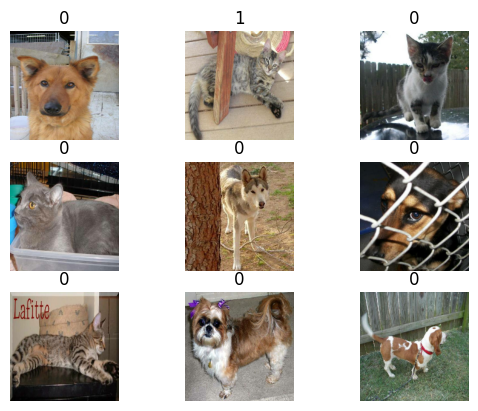

In [60]:
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [61]:
data_augmentation = keras.Sequential(
 [
 layers.RandomFlip("horizontal"),
 layers.RandomRotation(0.1),
 ]
)

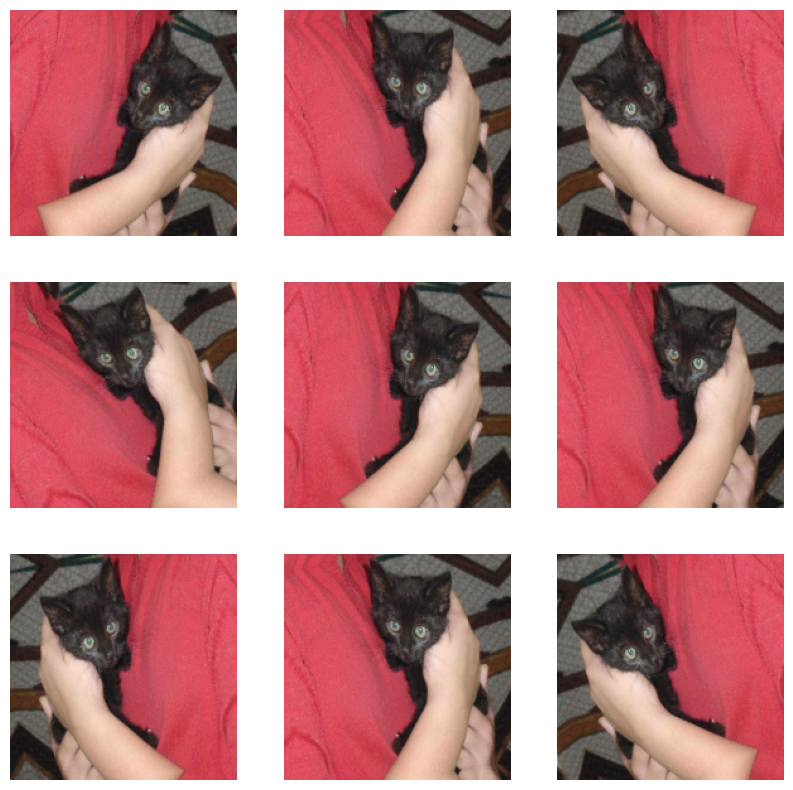

In [63]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [64]:
augmented_train_ds = train_ds.map(
 lambda x, y: (data_augmentation(x, training=True), y))

In [69]:
def make_model(input_shape, num_classes):
 inputs = keras.Input(shape=input_shape)
 # Image augmentation block
 x = data_augmentation(inputs)
 # Entry block
 x = layers.Rescaling(1.0 / 255)(x)
 x = layers.Conv2D(32, 3, strides=2, padding="same")(x)
 x = layers.BatchNormalization()(x)
 x = layers.Activation("relu")(x)
 x = layers.Conv2D(64, 3, padding="same")(x)
 x = layers.BatchNormalization()(x)
 x = layers.Activation("relu")(x)
 previous_block_activation = x # Set aside residual
 for size in [128, 256, 512, 728]:
  x = layers.Activation("relu")(x)
  x = layers.SeparableConv2D(size, 3, padding="same")(x)
  x = layers.BatchNormalization()(x)
  x = layers.Activation("relu")(x)
  x = layers.SeparableConv2D(size, 3, padding="same")(x)
  x = layers.BatchNormalization()(x)
  x = layers.MaxPooling2D(3, strides=2, padding="same")(x)
  # Project residual
  residual = layers.Conv2D(size, 1, strides=2, padding="same")(
  previous_block_activation
  )
  x = layers.add([x, residual]) # Add back residual
  previous_block_activation = x # Set aside next residual
 x = layers.SeparableConv2D(1024, 3, padding="same")(x)
 x = layers.BatchNormalization()(x)
 x = layers.Activation("relu")(x)
 x = layers.GlobalAveragePooling2D()(x)
 if num_classes == 2:
  activation = "sigmoid"
  units = 1
 else:
  activation = "softmax"
  units = num_classes
 x = layers.Dropout(0.5)(x)
 outputs = layers.Dense(units, activation=activation)(x)
 return keras.Model(inputs, outputs)

model = make_model(input_shape=image_size + (3,), num_classes=2)
keras.utils.plot_model(model, show_shapes=True)

In [68]:
 x = layers.BatchNormalization()(x)
 x = layers.Activation("relu")(x)
 x = layers.SeparableConv2D(size, 3, padding="same")(x)
 x = layers.BatchNormalization()(x)
 x = layers.MaxPooling2D(3, strides=2, padding="same")(x)
 # Project residual
 residual = layers.Conv2D(size, 1, strides=2, padding="same")(
 previous_block_activation
 )
 x = layers.add([x, residual]) # Add back residual
 previous_block_activation = x # Set aside next residual
 x = layers.SeparableConv2D(1024, 3, padding="same")(x)
 x = layers.BatchNormalization()(x)
 x = layers.Activation("relu")(x)
 x = layers.GlobalAveragePooling2D()(x)
 if num_classes == 2:
  activation = "sigmoid"
  units = 1
 else:
  activation = "softmax"
  units = num_classes
 x = layers.Dropout(0.5)(x)
 outputs = layers.Dense(units, activation=activation)(x)
 return keras.Model(inputs, outputs)
model = make_model(input_shape=image_size + (3,), num_classes=2)
keras.utils.plot_model(model, show_shapes=True)

NameError: name 'x' is not defined

In [71]:
epochs = 50
callbacks = [
 keras.callbacks.ModelCheckpoint("save_at_{epoch}.h5"),
]
model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)

In [77]:
history = model.fit(
    augmented_train_ds, epochs=epochs, callbacks=callbacks, validation_data=val_ds
)

Epoch 1/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step - accuracy: 0.6566 - loss: 0.6444

75/75 ━━━━━━━━━━━━━━━━━━━━ 20s 263ms/step - accuracy: 0.6566 - loss: 0.6444 - val_accuracy: 0.6600 - val_loss: 0.6514
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step - accuracy: 0.6615 - loss: 0.6397

75/75 ━━━━━━━━━━━━━━━━━━━━ 20s 266ms/step - accuracy: 0.6616 - loss: 0.6397 - val_accuracy: 0.6650 - val_loss: 0.6445
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step - accuracy: 0.6619 - loss: 0.6368

75/75 ━━━━━━━━━━━━━━━━━━━━ 20s 266ms/step - accuracy: 0.6619 - loss: 0.6368 - val_accuracy: 0.6650 - val_loss: 0.6398
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step - accuracy: 0.6545 - loss: 0.6448

75/75 ━━━━━━━━━━━━━━━━━━━━ 20s 262ms/step - accuracy: 0.6546 - loss: 0.6447 - val_accuracy: 0.6533 - val_loss: 0.6507
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step - accuracy: 0.6574 - loss: 0.6397

75/75 ━━━━━━━━━━━━━━━━━━━━ 20s 259ms/step - accuracy: 0.6575 - loss: 0.6396 - val_accuracy: 0.6650 - val_loss: 0.6442
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step - accuracy: 0.6669 - loss: 0.6379

75/75 ━━━━━━━━━━━━━━━━━━━━ 20s 262ms/step - accuracy: 0.6669 - loss: 0.6379 - val_accuracy: 0.6350 - val_loss: 0.6905
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step - accuracy: 0.6584 - loss: 0.6411

75/75 ━━━━━━━━━━━━━━━━━━━━ 20s 265ms/step - accuracy: 0.6585 - loss: 0.6410 - val_accuracy: 0.6650 - val_loss: 0.6777
Epoch 8/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step - accuracy: 0.6530 - loss: 0.6454

75/75 ━━━━━━━━━━━━━━━━━━━━ 20s 260ms/step - accuracy: 0.6532 - loss: 0.6453 - val_accuracy: 0.6617 - val_loss: 0.6526
Epoch 9/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step - accuracy: 0.6674 - loss: 0.6353

75/75 ━━━━━━━━━━━━━━━━━━━━ 21s 263ms/step - accuracy: 0.6674 - loss: 0.6353 - val_accuracy: 0.6633 - val_loss: 0.6464
Epoch 10/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step - accuracy: 0.6625 - loss: 0.6446

75/75 ━━━━━━━━━━━━━━━━━━━━ 20s 262ms/step - accuracy: 0.6626 - loss: 0.6446 - val_accuracy: 0.6650 - val_loss: 0.6521
Epoch 11/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step - accuracy: 0.6629 - loss: 0.6410

75/75 ━━━━━━━━━━━━━━━━━━━━ 20s 261ms/step - accuracy: 0.6629 - loss: 0.6410 - val_accuracy: 0.6650 - val_loss: 0.6429
Epoch 12/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step - accuracy: 0.6560 - loss: 0.6424

75/75 ━━━━━━━━━━━━━━━━━━━━ 20s 263ms/step - accuracy: 0.6562 - loss: 0.6424 - val_accuracy: 0.6650 - val_loss: 0.6452
Epoch 13/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step - accuracy: 0.6683 - loss: 0.6352

75/75 ━━━━━━━━━━━━━━━━━━━━ 20s 260ms/step - accuracy: 0.6683 - loss: 0.6352 - val_accuracy: 0.6150 - val_loss: 0.6672
Epoch 14/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step - accuracy: 0.6702 - loss: 0.6340

75/75 ━━━━━━━━━━━━━━━━━━━━ 20s 260ms/step - accuracy: 0.6701 - loss: 0.6340 - val_accuracy: 0.6633 - val_loss: 0.6515
Epoch 15/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step - accuracy: 0.6547 - loss: 0.6443

75/75 ━━━━━━━━━━━━━━━━━━━━ 20s 262ms/step - accuracy: 0.6548 - loss: 0.6442 - val_accuracy: 0.6650 - val_loss: 0.6472
Epoch 16/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step - accuracy: 0.6627 - loss: 0.6376

75/75 ━━━━━━━━━━━━━━━━━━━━ 20s 263ms/step - accuracy: 0.6628 - loss: 0.6376 - val_accuracy: 0.4317 - val_loss: 0.8810
Epoch 17/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step - accuracy: 0.6439 - loss: 0.6466

75/75 ━━━━━━━━━━━━━━━━━━━━ 20s 261ms/step - accuracy: 0.6442 - loss: 0.6465 - val_accuracy: 0.6583 - val_loss: 0.6595
Epoch 18/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step - accuracy: 0.6623 - loss: 0.6503

75/75 ━━━━━━━━━━━━━━━━━━━━ 20s 261ms/step - accuracy: 0.6624 - loss: 0.6501 - val_accuracy: 0.6533 - val_loss: 0.6591
Epoch 19/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step - accuracy: 0.6570 - loss: 0.6420

75/75 ━━━━━━━━━━━━━━━━━━━━ 20s 261ms/step - accuracy: 0.6570 - loss: 0.6419 - val_accuracy: 0.6550 - val_loss: 0.6545
Epoch 20/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step - accuracy: 0.6552 - loss: 0.6447

75/75 ━━━━━━━━━━━━━━━━━━━━ 20s 262ms/step - accuracy: 0.6553 - loss: 0.6446 - val_accuracy: 0.6650 - val_loss: 0.6495
Epoch 21/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step - accuracy: 0.6636 - loss: 0.6367

75/75 ━━━━━━━━━━━━━━━━━━━━ 21s 264ms/step - accuracy: 0.6636 - loss: 0.6367 - val_accuracy: 0.6650 - val_loss: 0.6511
Epoch 22/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step - accuracy: 0.6718 - loss: 0.6358

75/75 ━━━━━━━━━━━━━━━━━━━━ 20s 260ms/step - accuracy: 0.6717 - loss: 0.6358 - val_accuracy: 0.6650 - val_loss: 0.6428
Epoch 23/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step - accuracy: 0.6471 - loss: 0.6340

75/75 ━━━━━━━━━━━━━━━━━━━━ 20s 261ms/step - accuracy: 0.6473 - loss: 0.6340 - val_accuracy: 0.6650 - val_loss: 0.6521
Epoch 24/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step - accuracy: 0.6607 - loss: 0.6377

75/75 ━━━━━━━━━━━━━━━━━━━━ 20s 261ms/step - accuracy: 0.6608 - loss: 0.6377 - val_accuracy: 0.6650 - val_loss: 0.6468
Epoch 25/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step - accuracy: 0.6594 - loss: 0.6396

75/75 ━━━━━━━━━━━━━━━━━━━━ 20s 260ms/step - accuracy: 0.6595 - loss: 0.6396 - val_accuracy: 0.6650 - val_loss: 0.6484
Epoch 26/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step - accuracy: 0.6610 - loss: 0.6357

75/75 ━━━━━━━━━━━━━━━━━━━━ 20s 263ms/step - accuracy: 0.6611 - loss: 0.6358 - val_accuracy: 0.6650 - val_loss: 0.6420
Epoch 27/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step - accuracy: 0.6649 - loss: 0.6357

75/75 ━━━━━━━━━━━━━━━━━━━━ 20s 260ms/step - accuracy: 0.6649 - loss: 0.6356 - val_accuracy: 0.6650 - val_loss: 0.6483
Epoch 28/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step - accuracy: 0.6599 - loss: 0.6362

75/75 ━━━━━━━━━━━━━━━━━━━━ 20s 266ms/step - accuracy: 0.6600 - loss: 0.6362 - val_accuracy: 0.6650 - val_loss: 0.6574
Epoch 29/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step - accuracy: 0.6694 - loss: 0.6352

75/75 ━━━━━━━━━━━━━━━━━━━━ 20s 263ms/step - accuracy: 0.6695 - loss: 0.6352 - val_accuracy: 0.6650 - val_loss: 0.6711
Epoch 30/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step - accuracy: 0.6558 - loss: 0.6422

75/75 ━━━━━━━━━━━━━━━━━━━━ 20s 260ms/step - accuracy: 0.6559 - loss: 0.6421 - val_accuracy: 0.6667 - val_loss: 0.6416
Epoch 31/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step - accuracy: 0.6585 - loss: 0.6377

75/75 ━━━━━━━━━━━━━━━━━━━━ 20s 263ms/step - accuracy: 0.6586 - loss: 0.6377 - val_accuracy: 0.6500 - val_loss: 0.6576
Epoch 32/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step - accuracy: 0.6671 - loss: 0.6315

75/75 ━━━━━━━━━━━━━━━━━━━━ 20s 266ms/step - accuracy: 0.6671 - loss: 0.6314 - val_accuracy: 0.6667 - val_loss: 0.6733
Epoch 33/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step - accuracy: 0.6509 - loss: 0.6393

75/75 ━━━━━━━━━━━━━━━━━━━━ 20s 265ms/step - accuracy: 0.6511 - loss: 0.6392 - val_accuracy: 0.6600 - val_loss: 0.6618
Epoch 34/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step - accuracy: 0.6619 - loss: 0.6316

75/75 ━━━━━━━━━━━━━━━━━━━━ 20s 262ms/step - accuracy: 0.6619 - loss: 0.6316 - val_accuracy: 0.6650 - val_loss: 0.6534
Epoch 35/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step - accuracy: 0.6652 - loss: 0.6297

75/75 ━━━━━━━━━━━━━━━━━━━━ 20s 261ms/step - accuracy: 0.6652 - loss: 0.6297 - val_accuracy: 0.6667 - val_loss: 0.6520
Epoch 36/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step - accuracy: 0.6583 - loss: 0.6374

75/75 ━━━━━━━━━━━━━━━━━━━━ 21s 262ms/step - accuracy: 0.6584 - loss: 0.6373 - val_accuracy: 0.6617 - val_loss: 0.6617
Epoch 37/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step - accuracy: 0.6641 - loss: 0.6320

75/75 ━━━━━━━━━━━━━━━━━━━━ 20s 262ms/step - accuracy: 0.6642 - loss: 0.6320 - val_accuracy: 0.6650 - val_loss: 0.6655
Epoch 38/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step - accuracy: 0.6567 - loss: 0.6394

75/75 ━━━━━━━━━━━━━━━━━━━━ 20s 260ms/step - accuracy: 0.6568 - loss: 0.6393 - val_accuracy: 0.6633 - val_loss: 0.6458
Epoch 39/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step - accuracy: 0.6594 - loss: 0.6344

75/75 ━━━━━━━━━━━━━━━━━━━━ 20s 262ms/step - accuracy: 0.6595 - loss: 0.6343 - val_accuracy: 0.6683 - val_loss: 0.6522
Epoch 40/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step - accuracy: 0.6613 - loss: 0.6296

75/75 ━━━━━━━━━━━━━━━━━━━━ 20s 263ms/step - accuracy: 0.6614 - loss: 0.6296 - val_accuracy: 0.6567 - val_loss: 0.6538
Epoch 41/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step - accuracy: 0.6612 - loss: 0.6372

75/75 ━━━━━━━━━━━━━━━━━━━━ 20s 261ms/step - accuracy: 0.6613 - loss: 0.6371 - val_accuracy: 0.5567 - val_loss: 0.6821
Epoch 42/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step - accuracy: 0.6624 - loss: 0.6265

75/75 ━━━━━━━━━━━━━━━━━━━━ 20s 262ms/step - accuracy: 0.6624 - loss: 0.6265 - val_accuracy: 0.6667 - val_loss: 0.6463
Epoch 43/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step - accuracy: 0.6626 - loss: 0.6362

75/75 ━━━━━━━━━━━━━━━━━━━━ 20s 265ms/step - accuracy: 0.6627 - loss: 0.6362 - val_accuracy: 0.6600 - val_loss: 0.6558
Epoch 44/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step - accuracy: 0.6638 - loss: 0.6335

75/75 ━━━━━━━━━━━━━━━━━━━━ 21s 267ms/step - accuracy: 0.6638 - loss: 0.6335 - val_accuracy: 0.6067 - val_loss: 0.6757
Epoch 45/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step - accuracy: 0.6594 - loss: 0.6303

75/75 ━━━━━━━━━━━━━━━━━━━━ 20s 262ms/step - accuracy: 0.6595 - loss: 0.6302 - val_accuracy: 0.6667 - val_loss: 0.6552
Epoch 46/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step - accuracy: 0.6739 - loss: 0.6311

75/75 ━━━━━━━━━━━━━━━━━━━━ 20s 261ms/step - accuracy: 0.6738 - loss: 0.6311 - val_accuracy: 0.6617 - val_loss: 0.6548
Epoch 47/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step - accuracy: 0.6662 - loss: 0.6225

75/75 ━━━━━━━━━━━━━━━━━━━━ 20s 264ms/step - accuracy: 0.6662 - loss: 0.6225 - val_accuracy: 0.6650 - val_loss: 0.6505
Epoch 48/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step - accuracy: 0.6554 - loss: 0.6313

75/75 ━━━━━━━━━━━━━━━━━━━━ 20s 265ms/step - accuracy: 0.6556 - loss: 0.6312 - val_accuracy: 0.6617 - val_loss: 0.6467
Epoch 49/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step - accuracy: 0.6685 - loss: 0.6280

75/75 ━━━━━━━━━━━━━━━━━━━━ 20s 259ms/step - accuracy: 0.6684 - loss: 0.6280 - val_accuracy: 0.6483 - val_loss: 0.6616
Epoch 50/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step - accuracy: 0.6662 - loss: 0.6243

75/75 ━━━━━━━━━━━━━━━━━━━━ 20s 266ms/step - accuracy: 0.6662 - loss: 0.6242 - val_accuracy: 0.6583 - val_loss: 0.6740


In [74]:
 optimizer=keras.optimizers.Adam(1e-3),
 loss="binary_crossentropy",
 metrics=["accuracy"],
)
model.fit(
 train_ds, epochs=epochs, callbacks=callbacks, validation_data=val_ds,
)

SyntaxError: unmatched ')' (ipython-input-261063402.py, line 4)

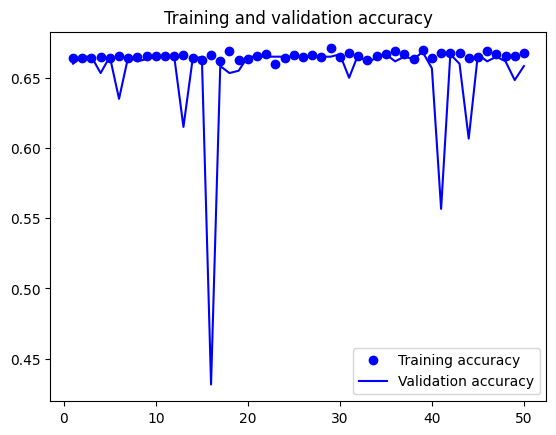

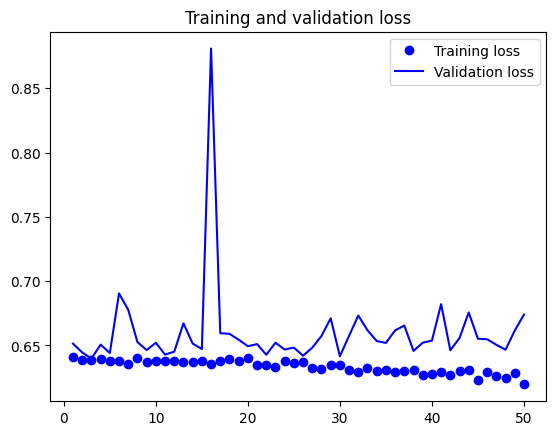

In [78]:
import matplotlib.pyplot as plt

accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [81]:
img = keras.preprocessing.image.load_img(
 "cats_and_dogs_filtered/train/cats/cat.1.jpg", target_size=image_size
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create batch axis
predictions = model.predict(img_array)
score = predictions[0]
print(
 "This image is %.2f percent cat and %.2f percent dog."
 % (100 * (1 - score), 100 * score)
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 802ms/step
This image is 70.12 percent cat and 29.88 percent dog.


/tmp/ipython-input-3672531914.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "This image is %.2f percent cat and %.2f percent dog."
